In [15]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
import math 
from sympy import *
import mplhep as hep

#plt.style.use(hep.style.ATLAS)
c= (const.c.to(u.um/u.ps)).value 
tau_b = 1.5 #ps
yb = 1
beta_b= yb*tau_b

tau_c = 0.7 #ps
yc = 1
beta_c= yc*tau_c

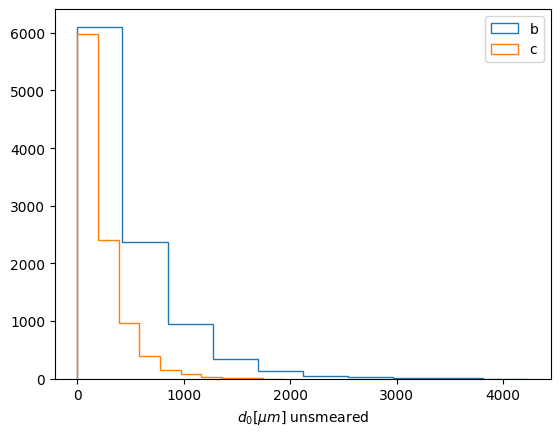

In [16]:
#sample from exponential decay times for b and multiply by c to get d_0 because d_0~c*tau
def exp_samples(beta):
    d0 = np.random.exponential(beta,10000)*c
    return d0

#plot it to check it runs as expected
d0_b=exp_samples(beta_b)
d0_c=exp_samples(beta_c)
plt.hist(d0_b, histtype= 'step', label= 'b')
plt.hist(d0_c, histtype= 'step', label= 'c')
plt.xlabel('$d_0 [\mu m]$ unsmeared')
plt.legend()
plt.show()



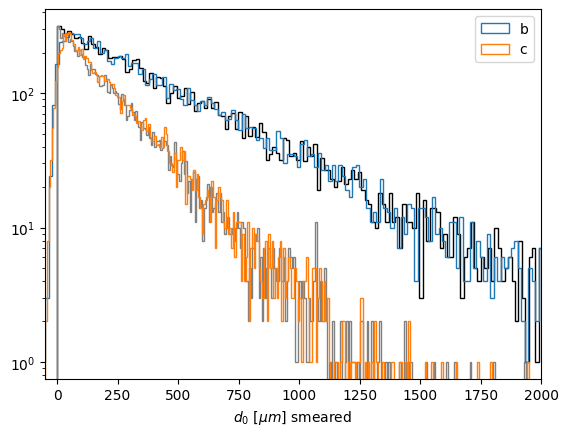

In [17]:
#then for each data point smear it with a given resolution 'res'
def smearing(d0, res):
    d0_smear = np.random.normal(d0, res,10**4)
    return d0_smear

#plot it, add more bins to make it readable
plt.hist(d0_b, histtype= 'step', bins=300, color = 'black') #unsmeared
plt.hist(d0_c, histtype= 'step', bins=300, color='grey')    #unsmeared
d0_b_s=smearing(d0_b, 20)
d0_c_s=smearing(d0_c, 20)
plt.hist(d0_b_s,histtype= 'step', bins= 300, label='b') #smeared
plt.hist(d0_c_s,histtype= 'step', bins=300, label='c') #smeared
plt.xlim(-50, 2000) #goes below 0 because d_0 at 0 can be smeared to the left
plt.yscale('log')
plt.xlabel('$d_0 \ [\mu m]$ smeared')
plt.legend()
plt.show()

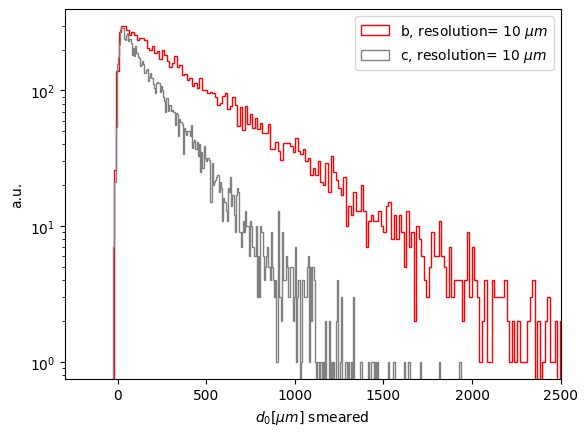

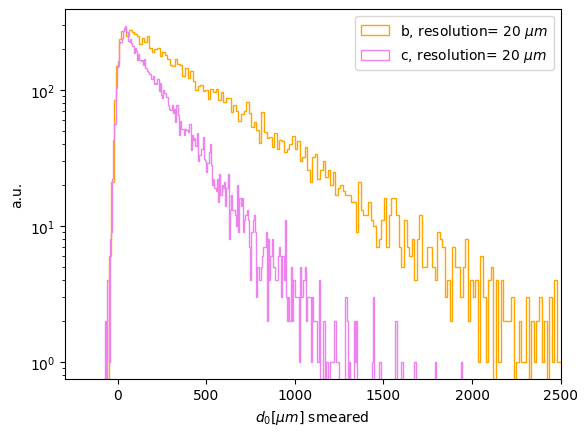

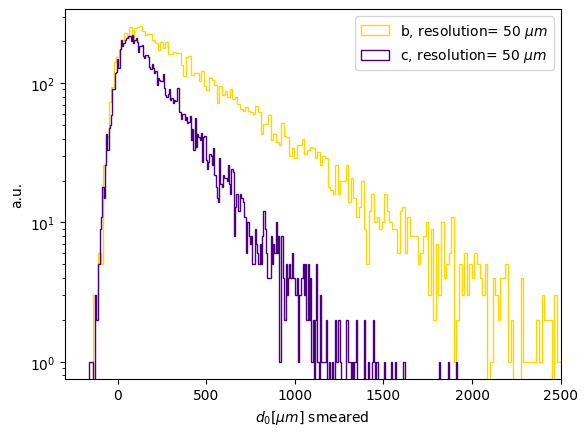

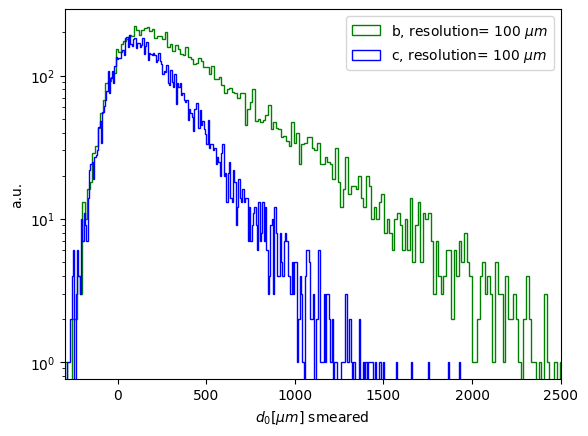

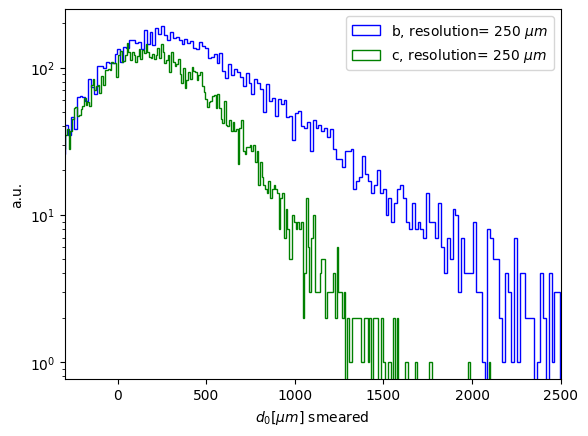

In [18]:
res_values = [10, 20, 50, 100, 250] #resolution values to test (in micro m)
colors = ['r', 'orange', 'gold', 'g', 'b', 'indigo', 'violet', 'grey']
colors2= colors[::-1]

#plot b versus c impact parameters for different resolutions
for _ in range(len(res_values)):
    d0_b_s=smearing(d0_b, res_values[_])
    d0_c_s=smearing(d0_c, res_values[_])
    plt.hist(d0_b_s,histtype= 'step', bins= 300, color= colors[_], label= f'b, resolution= {res_values[_]} $\mu m$')
    plt.hist(d0_c_s,histtype= 'step', bins=300, color= colors2[_], label= f'c, resolution= {res_values[_]} $\mu m$')
    
    plt.xlim(-300, 2500)
    plt.yscale('log')
    plt.xlabel('$d_0 [\mu m]$ smeared')
    plt.ylabel('a.u.')
    plt.legend()
    plt.show()

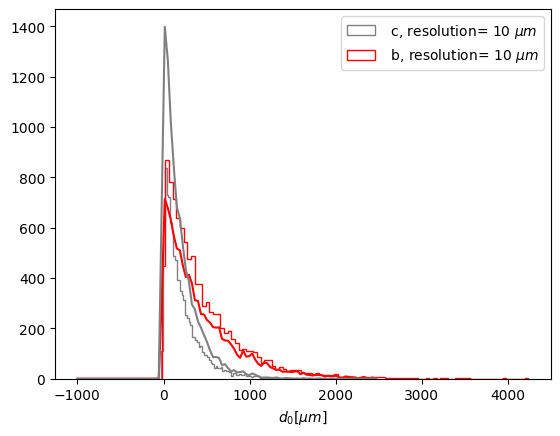

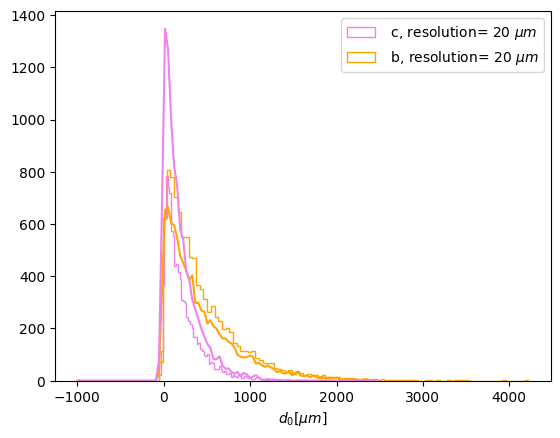

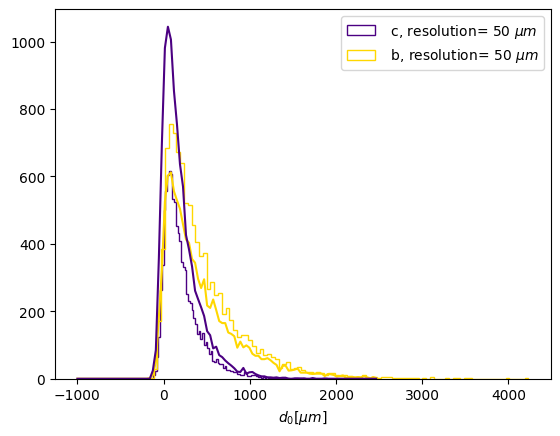

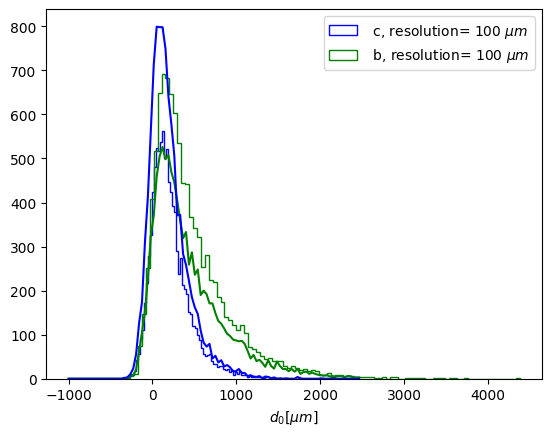

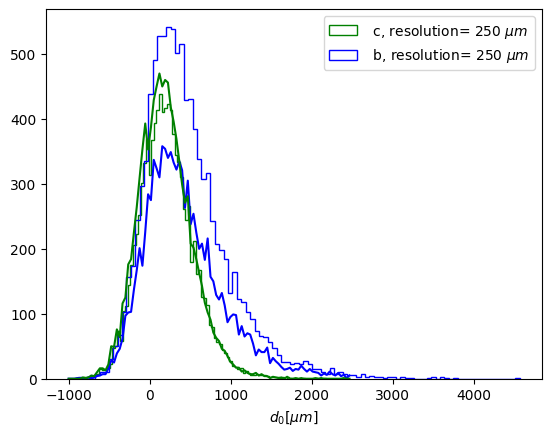

In [19]:
#binning data so that we can plot b counts versus c counts
n=100 #number of bins
res_values = [10, 20, 50, 100, 250]
colors = ['r', 'orange', 'gold', 'g', 'b', 'indigo', 'violet', 'grey']
colors2 = colors[::-1]
for _ in range(len(res_values)):
    d0_b_s=smearing(d0_b, res_values[_])
    counts_b, bin_edges_b = np.histogram(d0_b_s, bins=n, range = (-1000, 2500))
    d0_c_s=smearing(d0_c, res_values[_])
    counts_c, bin_edges_c = np.histogram(d0_c_s, bins=n, range = (-1000, 2500))
    plt.hist(d0_c_s, histtype = 'step', bins= n, color= colors2[_], label = f' c, resolution= {res_values[_]} $\mu m$')
    plt.hist(d0_b_s, histtype = 'step', bins= n, color= colors[_], label = f' b, resolution= {res_values[_]} $\mu m$')
    #print(bin_edges_b, bin_edges_c)
    plt.plot(bin_edges_b[0:n], counts_b[0:n], color= colors[_])
    plt.plot(bin_edges_c[0:n], counts_c[0:n], color= colors2[_])
    plt.xlabel('$d_0 [\mu m]$')
    plt.legend()
    plt.show()
    # plt.plot(counts_b, counts_c, label = f'resolution= {res_values[_]} $\mu m$')
    # plt.xlabel('b counts')
    # plt.ylabel('c counts')
    # plt.legend()

In [20]:
from scipy.integrate import simpson #integrate to go from a PDF to CDF

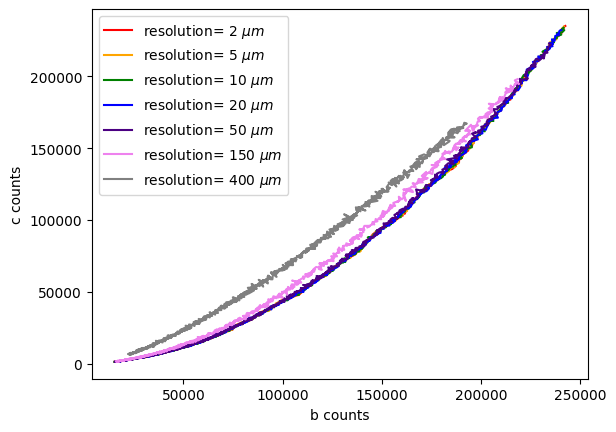

In [27]:
res_values = [2, 5, 10, 20, 50, 150, 400]
colors = ['r', 'orange','g',  'b', 'indigo', 'violet', 'grey']
range_s=np.linspace(-1000,1500,1000) #integral start values 
range_e=2500 #integral end value
n=100 #number of bins

for _ in range(len(res_values)):
    area_c =[] #loop through for different resolutions
    area_b =[]
    for s in range(len(range_s)):
        #change the start value for the integral
        #we are integrating under the curve starting from higher d_0 and working in
        #in the higher d_0 region there is more b than c, this is how we discriminate between them
        d0_b_s=smearing(d0_b, res_values[_])
        counts_b, bin_edges_b = np.histogram(d0_b_s, bins=n, range = (s, range_e))
        d0_c_s=smearing(d0_c, res_values[_])
        counts_c, bin_edges_c = np.histogram(d0_c_s, bins=n, range = (s, range_e))
        area_c.append(simpson(counts_c[0:n], dx=(range_e-s)/n))
        #print('c', area_c)
        #
        area_b.append(simpson(counts_b[0:n], dx=(range_e -s)/n))
        #print('b', area_b)
        #plt.plot(bin_edges_b[0:n], counts_b[0:n], color= 'r')
        #plt.plot(bin_edges_c[0:n], counts_c[0:n], color= 'b')
    plt.plot(area_b, area_c, color = colors[_], label = f'resolution= {res_values[_]} $\mu m$')
    

plt.xlabel('b counts')
plt.ylabel('c counts')
plt.legend()
#as you can see, as the resolution gets worse the amount of c almost is 1:1 with the amount of b

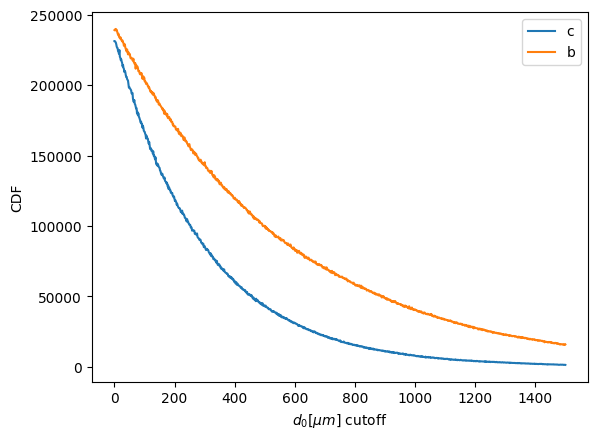

Text(0, 0.5, 'c')

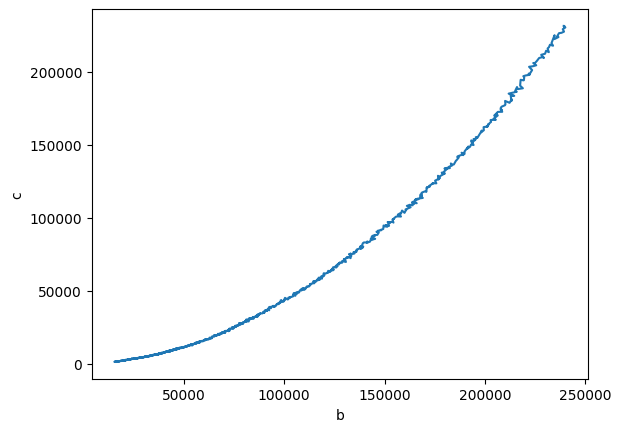

In [24]:
area_c =[]
area_b =[]
for s in range(len(range_s)):
    d0_b_s=smearing(d0_b, 20) #res=20
    counts_b, bin_edges_b = np.histogram(d0_b_s, bins=n, range = (s, range_e))
    d0_c_s=smearing(d0_c, 20)
    counts_c, bin_edges_c = np.histogram(d0_c_s, bins=n, range = (s, range_e))
    area_c.append(simpson(counts_c[0:n], dx=(range_e-s)/n))
    #print('c', area_c)
    area_b.append(simpson(counts_b[0:n], dx=(range_e -s)/n))
plt.plot(range_s, area_c, label ='c')
plt.plot(range_s, area_b, label= 'b')
plt.legend()
plt.xlabel('$d_0 [\mu m]$ cutoff')
plt.ylabel(r'CDF')
plt.show()
plt.plot(area_b, np.array(area_c))
plt.xlabel('b')
plt.ylabel('c')

"transverse impact parameter resolution better than 2 µm" 
https://lss.fnal.gov/archive/test-tm/2000/fermilab-tm-2554.pdf